# Multi-layer Perceptron Regression

Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

In [14]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

'''
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. 
For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], 
or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling 
to the test set for meaningful results. You can use StandardScaler for standardization.
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neural_network import MLPRegressor
import numpy as np

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5)],
              'solver' : ['sgd'],
              'batch_size': [128],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[50]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 10) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=50, solver=sgd 
[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=50, solver=sgd, score=0.722, total=   0.0s
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=50, solver=sgd 
[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=50, solver=sgd, score=0.870, total=   0.0s
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=50, solver=sgd 
[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=50, solver=sgd, score=0.791, total=   0.0s
[CV] alpha=0.01, batch_size=128, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=50, solver=sgd 
[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(10, 5), learning_rate=constant, max_ite

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/mausoto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/mausoto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/home/mausoto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max

[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=50, solver=sgd, score=0.791, total=   0.0s
***GRIDSEARCH RESULTS***
Best score: 0.794387 using {'alpha': 0.01, 'batch_size': 128, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'sgd'}
0.794321 (0.060487) with: {'alpha': 0.1, 'batch_size': 128, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'sgd'}
0.794387 (0.060479) with: {'alpha': 0.01, 'batch_size': 128, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'sgd'}


/home/mausoto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
/home/mausoto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8192614694854665

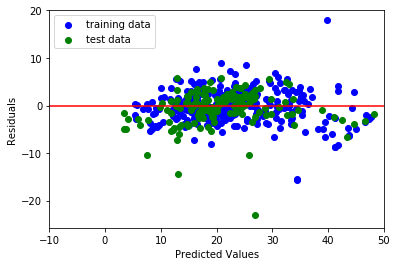

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [16]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.3379826989706527
MSE train:  10.534712609965396
RMSE train:  3.245722201600962
r2:  0.938161197570336
MAE test:  2.502929969199434
MSE test:  13.467387397025286
RMSE test:  3.6697939175143452
r2:  0.9051306366958676
